In [10]:
## import all the module 
from data_cleaning import*
from model import *
from dice_cofficient import *


if __name__ == '__main__':
    
    
    #### load training data and testing data
    path_ground_truth="ISIC2018_Task1_Training_GroundTruth_x2/"
    path_train="ISIC2018_Task1-2_Training_Input_x2/"
    truth = load_data(path_ground_truth)[1:]
    train = load_data(path_train)[1:]
    X = read_data(train[0:-1],2)
    y = read_data(truth[0:-1],1)
    
    #### creat mask for training
    
    
    X_train, X_val,X_test,y_train,y_val,y_test = shuffle_data(X,y)
    y_train=creat_mask(y_train)
    y_val=creat_mask(y_val)
    y_test=creat_mask(y_test)
    
    #### normalize the data    
    X_train = np.array(X_train)/255
    X_val = np.array(X_val)/255
    X_test = np.array(X_test)/255
    y_train = np.array(y_train)
    y_val = np.array(y_val)
    y_test = np.array(y_test)

In [11]:
print(np.array(X_train).shape)
print(np.array(X_val).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_val).shape)
print(np.array(y_test).shape)

(1816, 256, 256, 3)
(389, 256, 256, 3)
(389, 256, 256, 3)
(1816, 256, 256, 2)
(389, 256, 256, 2)
(389, 256, 256, 2)


In [12]:
### model summary 
### input:(256,256,3)
### output:(256,256,2)
model=improved_unet_a(input_size=(256, 256, 3),output_channels=2)
model.compile(optimizer = Adam(),loss='binary_crossentropy', metrics = dice_coefficient)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 256, 256, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_29 (LeakyReLU)      (None, 256, 256, 16) 0           conv2d_30[0][0]                  
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 256, 256, 16) 2320        leaky_re_lu_29[0][0]             
____________________________________________________________________________________________

In [13]:
## training the model 
history = model.fit(X_train,y_train, epochs=50, batch_size=8, validation_data = (X_val,y_val))

Epoch 1/50
227/227 [==============================] - 25s 97ms/step - loss: 0.3379 - dice_coefficient: 0.7899 - val_loss: 0.8507 - val_dice_coefficient: 0.7684
Epoch 2/50
227/227 [==============================] - 21s 91ms/step - loss: 0.2474 - dice_coefficient: 0.8532 - val_loss: 0.3269 - val_dice_coefficient: 0.83972582 - dice_coeff - ETA: 4s - loss: 0.2549 - dice - ETA: 3s - - ETA: 1s - los
Epoch 3/50
227/227 [==============================] - 21s 92ms/step - loss: 0.2315 - dice_coefficient: 0.8632 - val_loss: 0.2599 - val_dice_coefficient: 0.853816s - loss: 0.2265 - dice_coefficient: - ETA: 16s 
Epoch 4/50
227/227 [==============================] - 21s 92ms/step - loss: 0.2096 - dice_coefficient: 0.8767 - val_loss: 0.2211 - val_dice_coefficient: 0.8733
Epoch 5/50
227/227 [==============================] - 21s 93ms/step - loss: 0.2095 - dice_coefficient: 0.8785 - val_loss: 0.2254 - val_dice_coefficient: 0.8742TA: 1s - loss: 0.2046 - dice_coeff - ETA: 1s - loss:
Epoch 6/50
227/227 [=

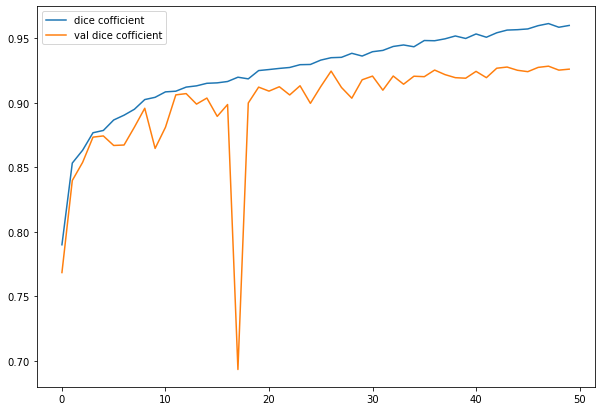

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(history.history['dice_coefficient'], label='dice cofficient')
plt.plot(history.history['val_dice_coefficient'], label ='val dice cofficient')
plt.legend()

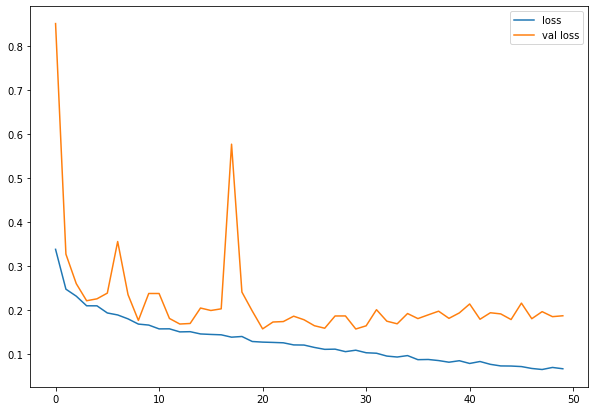

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()

In [34]:
####In this model, the dice cofficient of testing dataset is 
model.evaluate(X_test,y_test)


13/13 [==============================] - 1s 87ms/step - loss: 0.1683 - dice_coefficient: 0.9349


[0.16825717687606812, 0.9348688125610352]

In [114]:
###save the model
#!mkdir -p saved_model
#model.save('unet_improved')

In [ ]:
#model = tf.keras.models.load_model('unet_improved', custom_objects={'dice_coefficient':dice_coefficient})

In [37]:
def onehot_to_mask(mask, palette):
    """
    Converts a mask (H, W, K) to (H, W, C)
    retrived from:
    https://stackoverflow.com/questions/68920586/how-to-get-channels-in-a-segmentation-mask-in-proper-order
    """
    x = np.argmax(mask, axis=-1)
    colour_codes = np.array(palette)
    x = np.uint8(colour_codes[x.astype(np.uint8)])
    return x



In [115]:
### reconstrucut groud truth
y_test[0]
palette=[[0],[255]]
y0=onehot_to_mask(y_test[0], palette)
y1=onehot_to_mask(y_test[1], palette)
y2=onehot_to_mask(y_test[2], palette)
y3=onehot_to_mask(y_test[3], palette)
y4=onehot_to_mask(y_test[4], palette)
y5=onehot_to_mask(y_test[5], palette)
y6=onehot_to_mask(y_test[6], palette)
y7=onehot_to_mask(y_test[7], palette)

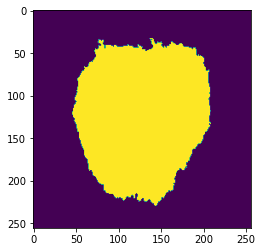

In [103]:
plt.imshow(c.reshape(256,256))

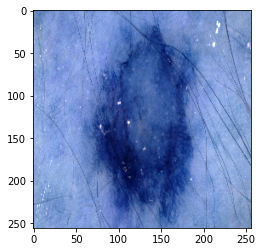

In [104]:
plt.imshow(X_test[3])

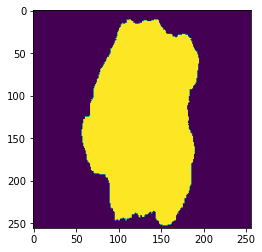

In [105]:

plt.imshow(tf.argmax(predict_y[3], axis=2))

Text(0.5, 1.0, 'GROUND TRUTH')

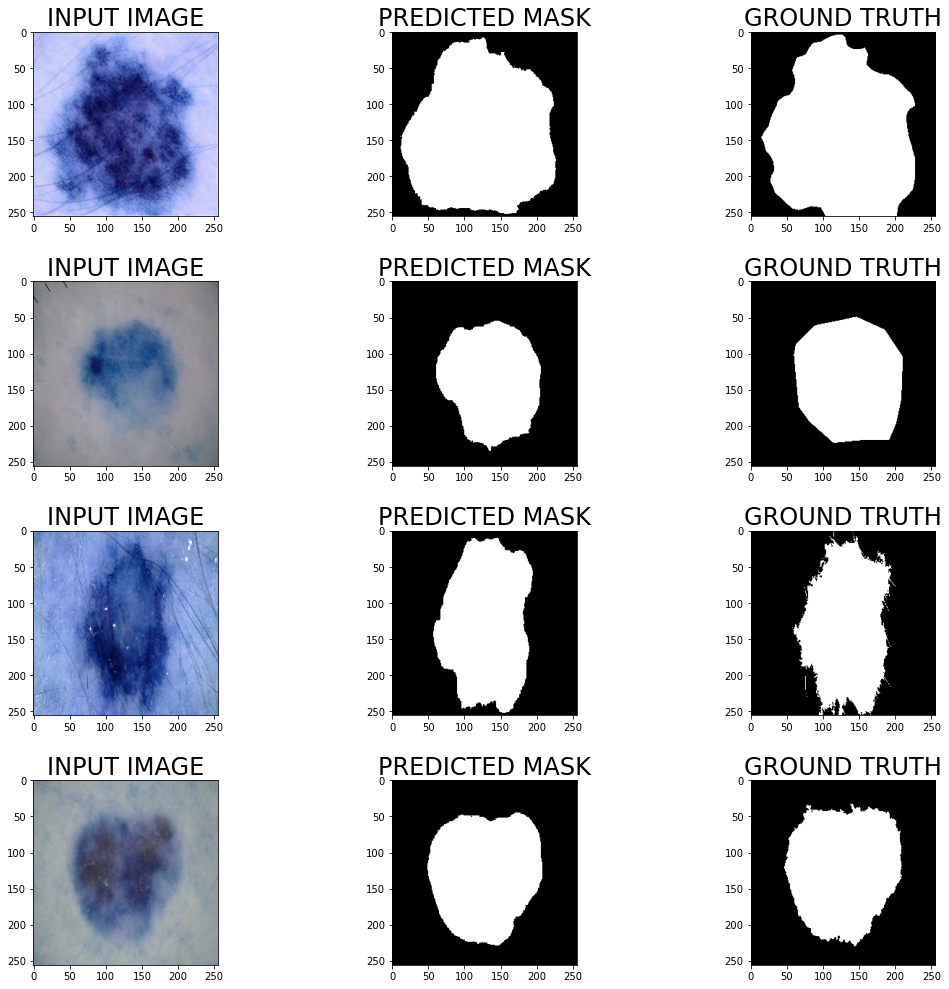

In [118]:
## plot some predicted results and comapre with the ground truth


plt.figure(figsize=(3.6 * 4, 4.8 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)


plt.subplot(4, 3, 0 + 1)
plt.imshow(X_test[0])
plt.title("INPUT IMAGE", size=24)
plt.subplot(4, 3, 2)
plt.imshow(tf.argmax(predict_y[0],axis=2),cmap=plt.cm.gray)
plt.title("PREDICTED MASK", size=24)
plt.subplot(4, 3, 3)
plt.imshow(y0,cmap=plt.cm.gray)
plt.title("GROUND TRUTH", size=24)

plt.subplot(4, 3, 4)
plt.imshow(X_test[1])
plt.title("INPUT IMAGE", size=24)
plt.subplot(4, 3, 5)
plt.imshow(tf.argmax(predict_y[1],axis=2),cmap=plt.cm.gray)
plt.title("PREDICTED MASK", size=24)
plt.subplot(4, 3, 6)
plt.imshow(y1,cmap=plt.cm.gray)
plt.title("GROUND TRUTH", size=24)


plt.subplot(4, 3, 7)
plt.imshow(X_test[3])
plt.title("INPUT IMAGE", size=24)
plt.subplot(4, 3, 8)
plt.imshow(tf.argmax(predict_y[3],axis=2),cmap=plt.cm.gray)
plt.title("PREDICTED MASK", size=24)
plt.subplot(4, 3, 9)
plt.imshow(y3,cmap=plt.cm.gray)
plt.title("GROUND TRUTH", size=24)


plt.subplot(4, 3, 10)
plt.imshow(X_test[4])
plt.title("INPUT IMAGE", size=24)
plt.subplot(4, 3, 11)
plt.imshow(tf.argmax(predict_y[4],axis=2),cmap=plt.cm.gray)
plt.title("PREDICTED MASK", size=24)
plt.subplot(4, 3, 12)
plt.imshow(y4,cmap=plt.cm.gray)
plt.title("GROUND TRUTH", size=24)